<a href="https://colab.research.google.com/github/chandank21/Dragon_Real_State-Price-Prediction-ML-Model/blob/main/Clustering_of_Electrical_Load_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path =  '/content/drive/MyDrive/datasets/household_power_consumption.txt'
cols_to_use = ['Date', 'Time','Global_active_power']

df_uci = pd.read_csv(data_path, sep=';', usecols=cols_to_use)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_uci.head(50)

In [4]:
df_uci['datetime'] = pd.to_datetime(df_uci['Date'] + ' '+ df_uci['Time'])

In [5]:
df_uci = df_uci.drop(['Date','Time'], axis=1)
df_uci = df_uci.set_index('datetime')

In [20]:
import numpy as np
df_uci = df_uci.replace('?', np.nan)
df_uci = df_uci.astype(np.float).fillna(method='bfill')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# For simplication,
# I will resample so that each row
# represents a whole hour
df_uci_hourly = df_uci.resample('H').mean()
x=df_uci.resample('H').mean()

In [22]:
df_uci_hourly['hour'] = df_uci_hourly.index.hour
#df_uci_hourly['month'] = df_uci_hourly.index.month
#df_uci_hourly['dayofweek'] = df_uci_hourly.index.dayofweek
df_uci_hourly.index = df_uci_hourly.index.date

df_uci_pivot = df_uci_hourly.pivot(columns ='hour')
df_uci_pivot = df_uci_pivot.dropna()

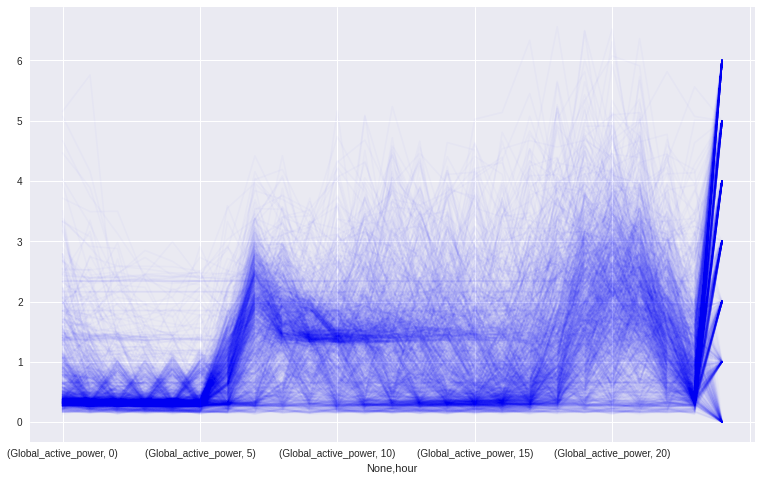

In [44]:
%matplotlib inline
plt.style.use('seaborn')
df_uci_pivot.T.plot(figsize=(13,8), legend=False, color='blue', alpha=0.02)

In [43]:
week_day = []
for x in df_uci_pivot.index:
  week_day.append(x.weekday())
df_uci_pivot['week_day']=week_day

In [ ]:
for 

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

sillhoute_scores = []
n_cluster_list = np.arange(2,31).astype(int)

X = df_uci_pivot.values.copy()
    
# Very important to scale!
sc = MinMaxScaler()
X = sc.fit_transform(X)

for n_cluster in n_cluster_list:
    
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append((f"cluster={n_cluster}",silhouette_score(X, kmeans.labels_)))

In [ ]:
sillhoute_scores

In [72]:
kmeans = KMeans(n_clusters=6)

In [73]:
cluster_found = kmeans.fit_predict(X)


In [74]:
kmeans.inertia_,kmeans.labels_

485.2583650012051

In [51]:
cluster_found

array([4, 3, 2, ..., 0, 2, 2], dtype=int32)

In [76]:
cluster_found_sr = pd.Series(cluster_found, name='cluster')
df_uci_pivot = df_uci_pivot.set_index(cluster_found_sr, append=True )
cluster_values = sorted(df_uci_pivot.index.get_level_values('cluster').unique())

In [58]:
centroid = kmeans.cluster_centers_

In [59]:
centroid.shape

(5, 24)

In [77]:
np.unique(df_uci_pivot.index.get_level_values('cluster'), return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([415,  47, 180, 231, 241, 342]))

In [ ]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
color_list = ['blue','red','green','yellow','pink','violet']

for cluster, color in zip(cluster_values, color_list):
    df_uci_pivot.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.02, color=color, label= f'Cluster {cluster}')
    df_uci_pivot.xs(cluster, level=1).median().plot(ax=ax, color=color, alpha=0.9, ls='--')

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
ax.legend()

In [ ]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
cluster = 0
color = 'blue'
df_uci_pivot.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.05, color=color, label= f'Cluster {cluster}')
df_uci_pivot.xs(cluster, level=1).median().plot(ax=ax, color=color, alpha=0.9, ls='--')

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
ax.legend()

In [ ]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
cluster = 1
color = 'red'
df_uci_pivot.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.05, color=color, label= f'Cluster {cluster}')
df_uci_pivot.xs(cluster, level=1).median().plot(ax=ax, color=color, alpha=0.9, ls='--')

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
ax.legend()

In [ ]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
cluster = 2
color = 'green'
df_uci_pivot.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.01, color=color, label= f'Cluster {cluster}')
df_uci_pivot.xs(cluster, level=1).median().plot(ax=ax, color=color, alpha=0.9, ls='--')

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
ax.legend()

In [ ]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
cluster = 3
color = 'yellow'
df_uci_pivot.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.07, color=color)
df_uci_pivot.xs(cluster, level=1).median().plot(ax=ax, color=color, alpha=0.9, ls='--')

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
ax.legend()

In [ ]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
cluster = 4
color = 'pink'
df_uci_pivot.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.08, color=color, label= f'Cluster {cluster}')
df_uci_pivot.xs(cluster, level=1).median().plot(ax=ax, color=color, alpha=1, ls='--')

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
ax.legend()

In [ ]:
fig, ax= plt.subplots(1,1, figsize=(18,10))
cluster = 5
color = 'violet'
df_uci_pivot.xs(cluster, level=1).T.plot(ax=ax, legend=False, alpha=0.08, color=color, label= f'Cluster {cluster}')
df_uci_pivot.xs(cluster, level=1).median().plot(ax=ax, color=color, alpha=1, ls='--')

ax.set_xticks(np.arange(1,25))
ax.set_ylabel('kilowatts')
ax.set_xlabel('hour')
ax.legend()

In [157]:
df_uci_hourly = df_uci.resample('H').sum()

df_uci_hourly['hour'] = df_uci_hourly.index.hour
df_uci_hourly['month'] = df_uci_hourly.index.month
df_uci_hourly['dayofweek'] = df_uci_hourly.index.dayofweek
df_uci_hourly['weekend'] = df_uci_hourly.index.dayofweek>4
df_uci_hourly.index = df_uci_hourly.index.date

In [ ]:
df_uci_hourly.head(50)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

sillhoute_scores = []
n_cluster_list = np.arange(2,50).astype(int)

X = df_uci_hourly.Global_active_power.values.copy().reshape(-1,1)

    
# Very important to scale!
sc = MinMaxScaler()
X = sc.fit_transform(X)

for n_cluster in n_cluster_list:
    
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append((f"cluster={n_cluster}",silhouette_score(X, kmeans.labels_)))

In [116]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [118]:
X = df_uci_hourly.Global_active_power.values.copy().reshape(-1,1)
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [153]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [154]:
df_uci_hourly['hourly_cluster'] = model.predict(X)

In [155]:
np.unique(df_uci_hourly.hourly_cluster.to_numpy(), return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([ 9546, 18297,  1763,  5345]))

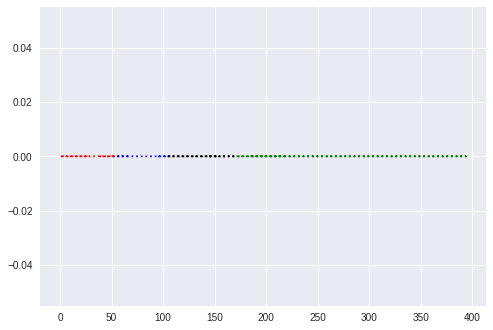

In [156]:
color = ['b','r','g','k']
for i in range(0,4):
  x=df_uci_hourly[df_uci_hourly.hourly_cluster == i].Global_active_power.to_numpy()	
  y= np.zeros(x.shape[0])
  plt.plot(x,y,color=color[i],ls='dotted')

plt.show()

In [ ]:
import matplotlib.pyplot as pp
ar = [1, 2, 3, 8, 4, 5]
pp.plot(ar, len(ar) * [0], "x")

In [125]:
model.cluster_centers_

array([[0.37328384],
       [0.13800949],
       [0.05165759],
       [0.2406238 ],
       [0.56823058]])

In [127]:
X.shape[0]

34951